### Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by equation 1

In [1]:
import pandas as pd

path = './datasets/ratings.csv'
user_ratings = pd.read_csv(path)

In [2]:
user_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [3]:
user_ids = user_ratings['userId']
movie_ids = user_ratings['movieId']
ratings = user_ratings['rating']

user_id = set(user_ids)
movie_id = set(movie_ids)
total_possible = len(user_id)*len(movie_id)
total_available = len(ratings)

the_sparity = total_available/total_possible
the_sparity

0.016439141608663475

### Question 2:
Plot a histogram showing the frequency of the rating values. To
be specific, bin the rating values into intervals of width 0.5 and use the binned
rating values as the horizontal axis. Count the number of entries in the ratings
matrix R with rating values in the binned intervals and use this count as the
vertical axis. Briefly comment on the shape of the histogram

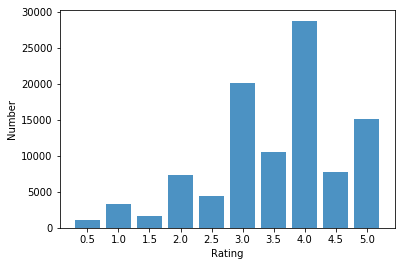

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

rating_dict = {}
for i in ratings:
    if i not in rating_dict:
        rating_dict[i] = 0
    else:
        rating_dict[i] += 1
    
plt.bar(np.linspace(0.5,5,10),list(rating_dict[k] for k in sorted(rating_dict.keys())) ,alpha=0.8, width=0.4)

xmajorLocator = MultipleLocator(0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(xmajorLocator) 

plt.xlabel('Rating')
plt.ylabel('Number')
plt.show()

### Question 3: 
Plot the distribution of ratings among movies. To be specific,
the X-axis should be the movie index ordered by decreasing frequency and the
Y-axis should be the number of ratings the movie has received.

In [5]:
number_of_movie_rating = {} # store the dict{movie id : the number of rating}
movie_ids_listed = list(movie_ids)
for i in movie_id:
    number_of_movie_rating[i] = movie_ids_listed.count(i)

In [6]:
number_of_movie_rating_sorted = sorted(number_of_movie_rating.items(), key=lambda e:e[1], reverse=True)# sorted dict by values i.e. the number of rating

movies_sorted = []
number_of_rating = []
for i in number_of_movie_rating_sorted:
    movies_sorted.append(i[0])
    number_of_rating.append(i[1])

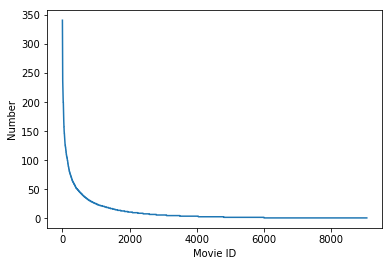

In [7]:
plt.plot(number_of_rating)
plt.xlabel('Movie ID')
plt.ylabel('Number')
plt.show()

### Question 4: 
Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated.

In [8]:
number_of_user_rating = {} # store the dict{user id : the number of movies the user have rated}
user_ids_listed = list(user_ids)
for i in user_id:
    number_of_user_rating[i] = user_ids_listed.count(i)

In [9]:
number_of_user_rating_sorted = sorted(number_of_user_rating.items(), key=lambda e:e[1], reverse=True)
# sorted dict by values i.e. the number of movies the user have rated

users_sorted = []
number_of_user_rating = []
for i in number_of_user_rating_sorted:
    users_sorted.append(i[0])
    number_of_user_rating.append(i[1])

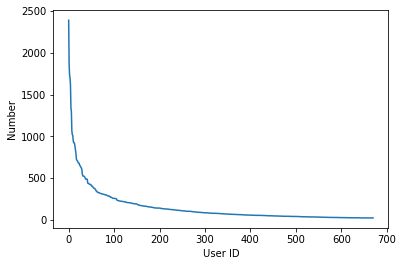

In [10]:
plt.plot(number_of_user_rating)
plt.xlabel('User ID')
plt.ylabel('Number')
plt.show()

### Question 5: 
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

A large number of movies received few ratings，and the number of ratings the movie receives is not the same，which can make it harder to train the model and the model has less accuracy and may not be stable.

### Question 6: 
Compute the variance of the rating values received by each movie.Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance
values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

In [11]:
from collections import defaultdict
import pandas as pd

d = defaultdict(list)
for i, j in zip(movie_ids, ratings):# create a multidict {movie id: [the ratings of the movie]}
    d[i].append(j)

In [12]:
movie_rating_variance = {}
for i, j in d.items():
    movie_rating_variance[i] = np.var(j) # create a dict {movie id: the variance of the rating values received by the movie }

In [13]:
movie_rating_variance.items()

dict_items([(31, 0.68835034013605445), (1029, 0.73880385487528355), (1061, 0.58126721763085409), (1129, 0.64192708333333337), (1172, 0.75803402646502815), (1263, 1.2056206597222221), (1287, 1.1729678638941399), (1293, 0.83648393194706994), (1339, 1.0601886094674557), (1343, 0.65220249835634458), (1371, 1.098234495246718), (1405, 0.89567580340264652), (1953, 0.5321361058601134), (2105, 0.86124943413309185), (2150, 1.0761959876543208), (2193, 1.4292800453514736), (2294, 0.94873620505517986), (2455, 0.98868266183793574), (2968, 1.4718766901027582), (3671, 0.60874089490114458), (10, 0.58774522977694166), (17, 0.85184559221200629), (39, 0.91416666666666679), (47, 0.80973243236553538), (50, 0.53301898467859699), (52, 0.81449442522106885), (62, 0.79449068569163661), (110, 1.0419504078177899), (144, 0.97965976331360938), (150, 0.58924374999999996), (153, 0.99552310558259716), (161, 0.60589843749999994), (165, 0.65879785756794274), (168, 0.7306652244456463), (185, 0.75165801614763539), (186, 0.